# Chunking Strategies

Chunks should be exhaustive and mutually exclusive

# Character Text splitter

- computationally cheap 
- text split is done on characters
- chunk size is measured by number of characters

In [31]:
# The pdf has already been extracted using docling as it had tables
from langchain.text_splitter import CharacterTextSplitter
with open('/workspaces/Implementing-RAG/extracted_data/Guardian Vision Insurance.md','rb') as file:
    text = file.read().decode('utf-8')
text_splitter = CharacterTextSplitter(
    chunk_size = 1000,
    #separator="\n\n",
    chunk_overlap = 100,
    length_function = len,
    is_separator_regex = False
)
texts = text_splitter.create_documents(text)
print(texts[0])

page_content='<'


# NLTK Text Splitter

In [63]:
from langchain.text_splitter import NLTKTextSplitter
text_splitter = NLTKTextSplitter(chunk_size=1000, chunk_overlap=100)
texts = text_splitter.split_text(text)
for i,text in enumerate(texts):
    print(f"--------------CHUNK {i}------------------")
    print(text)


Created a chunk of size 4620, which is longer than the specified 1000


--------------CHUNK 0------------------
<!-- image -->

## Vision Benefit Summary

## Why choose Guardian for your Vision insurance:

For just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services

- · Extensive network of vision specialists and medical professionals
- · Affordable coverage
- · Quick and easy claim payments

## About Your Benefits:

Option 1: Significant out-of-pocket savings available with your Full Feature plan by visiting one of VSP's network locations, including one of the largest private practice provider networks, Visionworks and contracted Pearle Vision locations.
--------------CHUNK 1------------------
| Your Vision Plan                                                                 | VSP Vision Premier                                    | VSP Vision Premier                   |
|--------------------------------------------------------------------------------

Using perplexity: 6


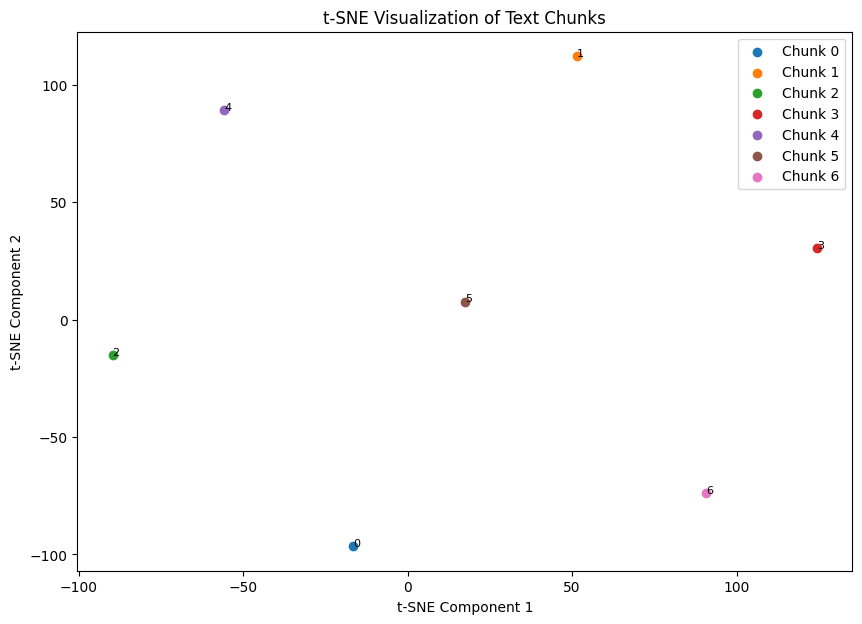

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings = model.encode(texts)

perplexity = min(30, len(texts) - 1)  
print(f"Using perplexity: {perplexity}")
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f'Chunk {i}')
    plt.annotate(f'{i}', (x, y), fontsize=8)

plt.title("t-SNE Visualization of Text Chunks")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


# Recursive Text Splitter

In [66]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100, length_function = len, is_separator_regex= False)

texts = text_splitter.create_documents(text)
for i,text in enumerate(texts):
    print(f"--------------CHUNK {i}------------------")
    print(text)

--------------CHUNK 0------------------
page_content='T'
--------------CHUNK 1------------------
page_content='h'
--------------CHUNK 2------------------
page_content='e'
--------------CHUNK 3------------------
page_content='G'
--------------CHUNK 4------------------
page_content='u'
--------------CHUNK 5------------------
page_content='a'
--------------CHUNK 6------------------
page_content='r'
--------------CHUNK 7------------------
page_content='d'
--------------CHUNK 8------------------
page_content='i'
--------------CHUNK 9------------------
page_content='a'
--------------CHUNK 10------------------
page_content='n'
--------------CHUNK 11------------------
page_content='p'
--------------CHUNK 12------------------
page_content='l'
--------------CHUNK 13------------------
page_content='a'
--------------CHUNK 14------------------
page_content='n'
--------------CHUNK 15------------------
page_content='d'
--------------CHUNK 16------------------
page_content='o'
--------------CHUNK 17--

# Document Chunking

In [71]:
with open('/workspaces/Implementing-RAG/extracted_data/Guardian Vision Insurance.md','rb') as file:
    text = file.read().decode('utf-8')
from langchain.text_splitter import MarkdownHeaderTextSplitter, Language
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

document_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
chunks=document_splitter.split_text(text)
for i,chunk in enumerate(chunks):
    print(f'---------------Chunk {i}-------------------')
    print(chunk)


---------------Chunk 0-------------------
page_content='<!-- image -->'
---------------Chunk 1-------------------
page_content='For just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services  
- · Extensive network of vision specialists and medical professionals
- · Affordable coverage
- · Quick and easy claim payments' metadata={'Header 2': 'Why choose Guardian for your Vision insurance:'}
---------------Chunk 2-------------------
page_content='Option 1: Significant out-of-pocket savings available with your Full Feature plan by visiting one of VSP's network locations, including one of the largest private practice provider networks, Visionworks and contracted Pearle Vision locations.  
| Your Vision Plan                                                                 | VSP Vision Premier                                    | VSP Vision Premier                   |
|--------------------

# Semantic Chunking

In [ ]:
# semantic chunking ensures chunks of texts are meaningful
# sentence splitting -> grouping of sentences -> embedding & similarity -> Threshold Comparison
! pip install langchain-experimental


In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.embeddings import OllamaEmbeddings
text_splitter = SemanticChunker(OllamaEmbeddings(model='nomic-embed-text'), breakpoint_threshold_type='percentile')
texts = text_splitter.create_documents([text]) # Access denied!

In [55]:
from llama_index.core import SimpleDirectoryReader

# load documents
documents = SimpleDirectoryReader(input_files=["/workspaces/Implementing-RAG/extracted_data/Guardian Vision Insurance.md"]).load_data()

In [56]:
from llama_index.core.node_parser import (
    SentenceSplitter,
    SemanticSplitterNodeParser,
)
from llama_index.embeddings.openai import OpenAIEmbedding
import os
embed_model = OpenAIEmbedding()
splitter = SemanticSplitterNodeParser(
    buffer_size=1, breakpoint_percentile_threshold=95,embed_model=embed_model
)
base_splitter = SentenceSplitter(chunk_size=512)
nodes = splitter.get_nodes_from_documents(documents)


In [62]:
print(nodes[1].get_content())
print('*'*40)
print(nodes[2].get_content())
print('*'*40)
print(nodes[3].get_content())
print('*'*40)
print(nodes[4].get_content())
print('*'*40)
print(nodes[5].get_content())



Vision Benefit Summary

****************************************


Why choose Guardian for your Vision insurance:

For just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services

- · Extensive network of vision specialists and medical professionals
- · Affordable coverage
- · Quick and easy claim payments

****************************************


About Your Benefits:

Option 1: Significant out-of-pocket savings available with your Full Feature plan by visiting one of VSP's network locations, including one of the largest private practice provider networks, Visionworks and contracted Pearle Vision locations.

| Your Vision Plan                                                                 | VSP Vision Premier                                    | VSP Vision Premier                   |
|----------------------------------------------------------------------------------|-------------

# Hybrid Chunker

In [69]:
# markdown needs to be converted using DoclingCOnverter
from docling.document_converter import DocumentConverter

DOC_SOURCE = "/workspaces/Implementing-RAG/extracted_data/Guardian Vision Insurance.md"

doc = DocumentConverter().convert(source=DOC_SOURCE).document

In [70]:
from transformers import AutoTokenizer

from docling.chunking import HybridChunker

EMBED_MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
MAX_TOKENS = 64

tokenizer = AutoTokenizer.from_pretrained(EMBED_MODEL_ID)
chunker = HybridChunker(
    tokenizer = tokenizer,
    max_tokens=MAX_TOKENS,
    merge_peers=True
)
chunk_iter=chunker.chunk(dl_doc=doc)
chunks = list(chunk_iter)
for i, chunk in enumerate(chunks):
    print(f"=== {i} ===")
    txt_tokens = len(tokenizer.tokenize(chunk.text, max_length=None))
    print(f"chunk.text ({txt_tokens} tokens):\n{repr(chunk.text)}")

    ser_txt = chunker.serialize(chunk=chunk)
    ser_tokens = len(tokenizer.tokenize(ser_txt, max_length=None))
    print(f"chunker.serialize(chunk) ({ser_tokens} tokens):\n{repr(ser_txt)}")

    print()

Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Running this sequence through the model will result in indexing errors


=== 0 ===
chunk.text (52 tokens):
'For just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services\n· Extensive network of vision specialists and medical professionals\n· Affordable coverage\n· Quick and easy claim payments'
chunker.serialize(chunk) (60 tokens):
'Why choose Guardian for your Vision insurance:\nFor just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services\n· Extensive network of vision specialists and medical professionals\n· Affordable coverage\n· Quick and easy claim payments'

=== 1 ===
chunk.text (46 tokens):
"Option 1: Significant out-of-pocket savings available with your Full Feature plan by visiting one of VSP's network locations, including one of the largest private practice provider networks, Visionworks and contracted Pearle Vision locations."
chunker.seri

In [73]:
for i, chunk in enumerate(chunks):
    print(f"=== {i} ===")
    print(chunk)
    print()

=== 0 ===
page_content='<!-- image -->'

=== 1 ===
page_content='For just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services  
- · Extensive network of vision specialists and medical professionals
- · Affordable coverage
- · Quick and easy claim payments' metadata={'Header 2': 'Why choose Guardian for your Vision insurance:'}

=== 2 ===
page_content='Option 1: Significant out-of-pocket savings available with your Full Feature plan by visiting one of VSP's network locations, including one of the largest private practice provider networks, Visionworks and contracted Pearle Vision locations.  
| Your Vision Plan                                                                 | VSP Vision Premier                                    | VSP Vision Premier                   |
|----------------------------------------------------------------------------------|-------------------------------

## Unstructured's Chunker

In [ ]:
!pip install unstructured

In [ ]:
!pip install libmagic-dev
!pip install poppler-utils
!pip install tesseract-ocr
!pip install pandoc

In [50]:
!pip install markdown

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [54]:
from unstructured.partition.md import partition_md
from unstructured.chunking.basic import chunk_elements
file_path = '/workspaces/Implementing-RAG/extracted_data/Guardian Vision Insurance.md'
elements = partition_md(file_path)
chunks = chunk_elements(elements)
for chunk in chunks:
    print("*"*40)
    print(chunk)

****************************************
Vision Benefit Summary

Why choose Guardian for your Vision insurance:

For just a few dollars a month, this coverage saves you money on optical wellness, as well as providing discounts on eyewear, contacts, and corrective vision services

· Extensive network of vision specialists and medical professionals

· Affordable coverage

· Quick and easy claim payments

About Your Benefits:
****************************************
Option 1: Significant out-of-pocket savings available with your Full Feature plan by visiting one of VSP's network locations, including one of the largest private practice provider networks, Visionworks and contracted Pearle Vision locations.
****************************************
Your Vision Plan VSP Vision Premier VSP Vision Premier Your Network is VSP Network Signature Plan Copay Exams Copay $ 10 Materials Copay (waived for elective contact lenses) $ 25 Sample of Covered Services You pay (after copay if applicable): You p